# Linear approximation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_linear_plot(x: np.ndarray, y: np.ndarray, k=1., b=0., pts_type='o', pts_color='r',
                     pts_label='Points', pts_size=10, plot_color='b', plot_type='-', plot_linew=2) -> None:
    fig, _ = plt.subplots(figsize=(9, 7))
    
    beg, end = x.min(), x.max()
    x_appx = np.linspace(beg, end, 1000)
    y_appx = k * x_appx + b
    plot_label = f'$f(x) = {k}x + {b}$' if b != 0 else f'$f(x) = {k}x$'
    plt.plot(x_appx, y_appx, plot_color+plot_type, label=plot_label, linewidth=plot_linew)
    
    plt.plot(x, y, pts_color+pts_type, markersize=5, label=pts_label)
    plt.title('ƒ(x) approximation', fontsize=25)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.minorticks_on()
    plt.legend(loc='best', fontsize=13)
    fig.tight_layout()
    plt.show()

### $f(x) = kx$

In [7]:
%%timeit

# Input data
x = .5 * np.arange(10).astype(np.float)
y = x + .5 * np.random.randn(10)

# Сalculation argmin
a, b = (x ** 2).mean(), (-2 * x * y).mean()
k = -b / (2 * a)

20.8 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


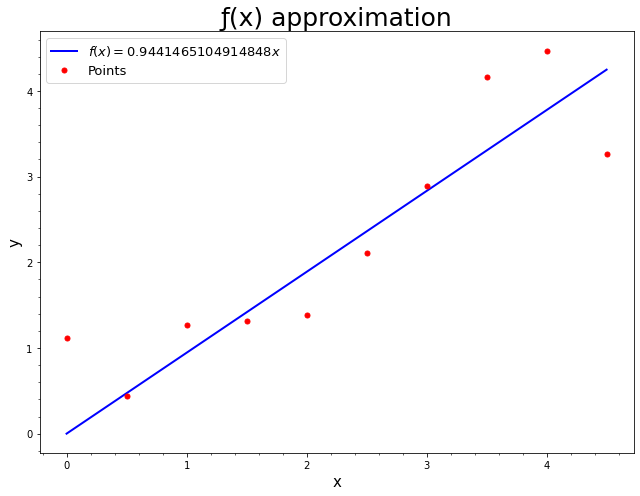

In [4]:
show_linear_plot(x, y, k=k)

### $f(x) = kx + b$

In [12]:
%%timeit

# Input data
x = np.float64([83, 71, 64, 69, 69, 64, 68, 59, 81, 91])
y = np.float64([183, 168, 171, 178, 176, 172, 165, 158, 183, 182])

# Ak^2 + Bkb + Cb^2 + Dk + Eb + F
A, B, C, D, E = (x ** 2).mean(), (2 * x).mean(), 1, (-2 * x * y).mean(), (-2 * y).mean()

# {2Ak + Bb = -D
# {Bb + 2Cb = -E
a = np.array([[2*A, B], [B, 2*C]])
b = np.array([-D, -E])
k, b = np.linalg.solve(a, b)

51.6 µs ± 8.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


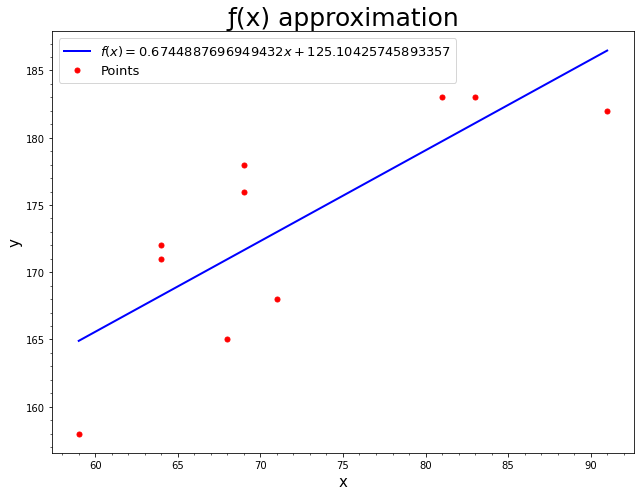

In [6]:
show_linear_plot(x, y, k=k, b=b)